# Team Ovintiv
#### The Finance Team
* Ana Roldan
* Elham Soufiani
* Guillermo Martinez-Dibene
* Mohsen Seifi
* Nishant Agrawal
* Yao Yao


# International investment position
### market value by currency, quarterly



This presentation contains the description of the data base from [Government of Canada](https://open.canada.ca/data/en/dataset/67e5b0f7-6307-4e13-8432-c4cd1e2e1adc).

Canada’s international investment position (IIP) measures the value of:

* Foreign assets owned by its residents (external assets)
* Domestic assets owned by foreigners (external liabilities)
* Net investment position is the difference between what Canada owns (its external assets) and what Canada owes (its external liabilities) to non-residents.


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# add data
df = pd.read_csv('./36100412.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   REF_DATE                                    3014 non-null   object 
 1   GEO                                         3014 non-null   object 
 2   DGUID                                       3014 non-null   object 
 3   Canada's international investment position  3014 non-null   object 
 4   Geographic region                           3014 non-null   object 
 5   Currency                                    3014 non-null   object 
 6   UOM                                         3014 non-null   object 
 7   UOM_ID                                      3014 non-null   int64  
 8   SCALAR_FACTOR                               3014 non-null   object 
 9   SCALAR_ID                                   3014 non-null   int64  
 10  VECTOR      

As we can see, this data base contains 17 variables and 3014 observations, from those variables the ones that are must of our interes are:

* __REF_DATE__, the quarter and year of the data
* __Canada's international investment position__, tipe of investment (assets and liabilities)
* __Currency__, the currency in which the investment is made
* __Value__, tha value in million of Dollars


In [42]:
df.loc[~df.STATUS.isnull()][:];
main_cols = ["REF_DATE", "Canada's international investment position", "Currency", "VALUE"]
df.drop(columns= df.columns[~df.columns.isin(main_cols)], inplace=True)
df = df.loc[~df.VALUE.isnull()]

df.set_index(pd.to_datetime(df.REF_DATE), inplace=True)
df.drop(columns="REF_DATE", inplace=True)

df.rename(columns={"Canada's international investment position":"ciip"}, inplace=True)
df.columns = [c.lower() for c in df.columns]
df.nunique()
#df.info()

ciip          23
currency       7
value       2716
dtype: int64

# Data description



### ciip

International investment position have three different level of categories.<br>

#### Total Assets
    Direct investment assets                                                 		
	Foreign portfolio investment
    Other Canadian investment
			
#### Total Liabilities			
	Canadian portfolio investment                                     		
	Direct investment liabilities                                   		
	Official international reserves                                        		
	Other foreign investment
    
#### Net position = Total Assets - Total Liabilities

    
### currency
Currency have 7 different descriptions <br>

    All currencies
    Canadian dollar
    United States dollar
    Euro
    United Kingdom pound sterling
    Japanese yen
    Other currencies
    
##### Further descriptions

The third level of ciip description are shown as follows:<br>
    
    Foreign portfolio investment                                		
		Foreign portfolio investment, Canadian debt securities                  	
		Foreign portfolio investment, Canadian equity and investment fund shares 	
			
    Other Canadian investment                                          		
		Other Canadian investment, currency and deposits                        	
		Other Canadian investment, loans                                   	
		Other Canadian investment, other accounts receivable                       	
		Other Canadian investment, trade credits and advances                    	
			
    Canadian portfolio investment                     		
		Canadian portfolio investment, foreign debt securities                   	
		Canadian portfolio investment, foreign equity and investment fund shares  	
			
    Other foreign investment                          		
		Other foreign investment, currency and deposits                     	
		Other foreign investment, loans                                   	
		Other foreign investment, other accounts payable                     	
		Other foreign investment, special drawing rights               	
		Other foreign investment, trade credits and advances

In [43]:
#total_ciip = ["Total liabilities", "Total assets", "Canada's net international investment position"]
#total_loc = df.ciip.isin(total_ciip)

#level1_assets = ["Direct investment assets", "Canadian portfolio investment", "Official international reserves", 
#                 "Other Canadian investment"]
#l1a_loc = df.ciip.isin(level1_assets)

#level1_liabilities = ["Direct investment liabilities", "Foreign portfolio investment", "Other foreign investment"]
#l1l_loc = df.ciip.isin(level1_liabilities)

#level2_assets = ["Direct investment assets", "Canadian portfolio investment, foreign debt securities", 
#                 "Canadian portfolio investment, foreign equity and investment fund shares ", 
#                 "Official international reserves", "Other Canadian investment, loans", 
#                 "Other Canadian investment, currency and deposits", 
#                 "Other Canadian investment, trade credits and advances", 
#                 "Other Canadian investment, other accounts receivable"]
#l2a_loc = df.ciip.isin(level2_assets)

#level2_liabilities = ["Direct investment liabilities", "Foreign portfolio investment, Canadian debt securities", 
#                     "Foreign portfolio investment, Canadian equity and investment fund shares", 
#                     "Other foreign investment, loans", "Other foreign investment, currency and deposits", 
#                     "Other foreign investment, special drawing rights", 
#                     "Other foreign investment, trade credits and advances", 
#                     "Other foreign investment, other accounts payable"]
#l2l_loc = df.ciip.isin(level2_liabilities)

# Data analysis
The next part of the presentation is for describing the data inside. We deliver some quick conclusions according to the observed data and analysis displayed by  [Bank of Canada](https://www.bankofcanada.ca/) from the same data. 

__Canada’s international investment position (IIP)__

* Assets
* Liabilities
* Net investment position

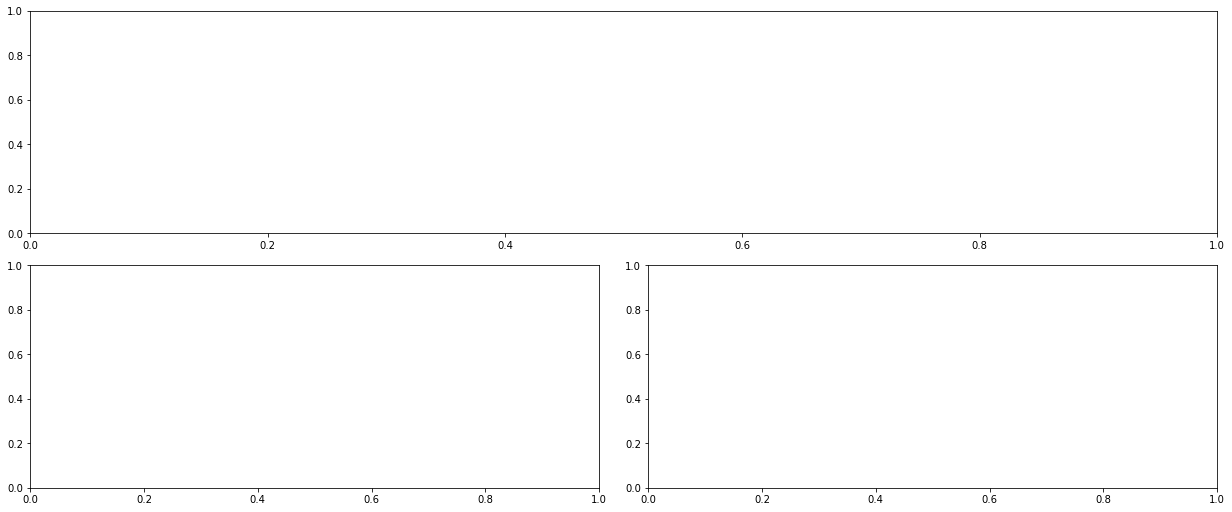

In [44]:
total_asset_df = df.loc[(df.ciip == "Total assets") & (df.currency == "All currencies")]
total_liab_df = df.loc[(df.ciip == "Total liabilities") & (df.currency == "All currencies")]
net_df = df.loc[(df.ciip == "Canada's net international investment position") & (df.currency == "All currencies")]

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2)

f_ax1 = fig.add_subplot(gs[0, :])
f_ax2 = fig.add_subplot(gs[1, 0])
f_ax3 = fig.add_subplot(gs[1, 1])

fig.set_size_inches(17, 7)

#total_asset_df.plot(ax=f_ax3, legend=False, xlabel=" ", color="black", linestyle=":", linewidth=3)

#total_liab_df.plot(ax=f_ax2, legend=False, xlabel=" ", color="black", linestyle=":", linewidth=3)

#net_df.plot(ax=f_ax1, legend=False, xlabel=" ", color="black", linestyle=":", linewidth=3)

#f_ax3.set_title("Total Assets")
#f_ax2.set_title("Total liabilities")


#f_ax1.set_title("Canada's net international investment position");

As seen in the previous graphs, the __Canadian Net international investment position__ remains positive for all the periods. This let Canada's international investment position continue to act as an __economic stabilizer__, according to [Canada’s International Investment Position: Benefits and Potential Vulnerabilities](https://www.bankofcanada.ca/wp-content/uploads/2017/06/fsr-june17-bruneau.pdf).

This let the economy, not to suffer instant drops when a global crisis as the one we are living, as the observed in the previous graph for first period of 2020.

The __currency composition__ of a country’s external assets and liabilities determines the potential for stabilization due to exchange rate gains

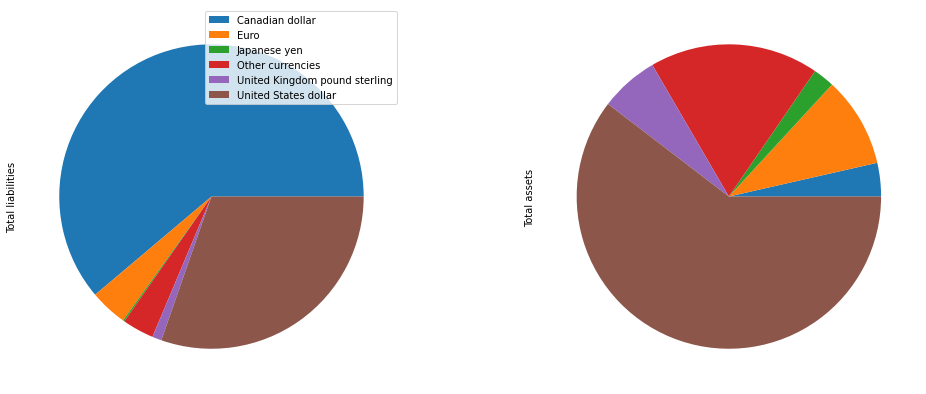

In [45]:
# Plot of Canada's average assets vs liabilities based on different currencies (including CAD)

total_plt_loc = (total_loc) & (df.currency != "All currencies")
total_ciip_df = df.loc[total_plt_loc].groupby(by=["ciip", "currency"]).mean().unstack("ciip")

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(17, 7)


total_ciip_df.iloc[:]["value"]["Total liabilities"].plot.pie(legend=True, labels=None,
ax=axes[0])

total_ciip_df.iloc[:]["value"]["Total assets"].plot.pie(legend=False, labels=None, ax=axes[1]);


The above graph represent the percentage in mean value of the composition of the external assets and liabilities portfolio.
As seen in the first graph, more than 50% of the Liabilities are denominated in __Canadian dollar__,which represent that most of canadian debt is issued in its own currency, which make it easier to pay. From the second graph, a thing to remark is that more than 50% of the assets are denominated in __United States dollar__ wich give the country stability beeing this currency the most stable currency. 